# This file is used for output the simulated data for Patient 1

In [1]:
import vep_prepare_sim

In [2]:
roi = vep_prepare_sim.read_vep_mrtrix_lut()

In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
import glob

In [5]:
pid = 'Patient1'
ipid = 'P1'
file_basic = f'{ipid}_TI_EEG_fit.npz'
basic_data_dir = f'/data/dataSim/{pid}/'
sensor_data_file = f'{basic_data_dir}/{file_basic}'

sensor_data = np.load(sensor_data_file)

In [6]:
sensor_data.files

['time_steps', 'seeg', 'SC', 'gain', 'ch_names']

In [7]:
seeg = sensor_data['seeg']

In [8]:
time = sensor_data['time_steps']*10

In [9]:
time

array([    0,    10,    20, ..., 17470, 17480, 17490])

In [10]:
ch_names = sensor_data['ch_names'].tolist()

show_ch = ["E54","E56","E57","E60","E61","E64","E66","E68","E69","E70"]

nch = [ch_names.index(ichan) for ichan in show_ch]

In [11]:
import numpy

Nsamp = 0.02
seeg_noise = seeg + numpy.random.normal(0, Nsamp, size=len(seeg.T))

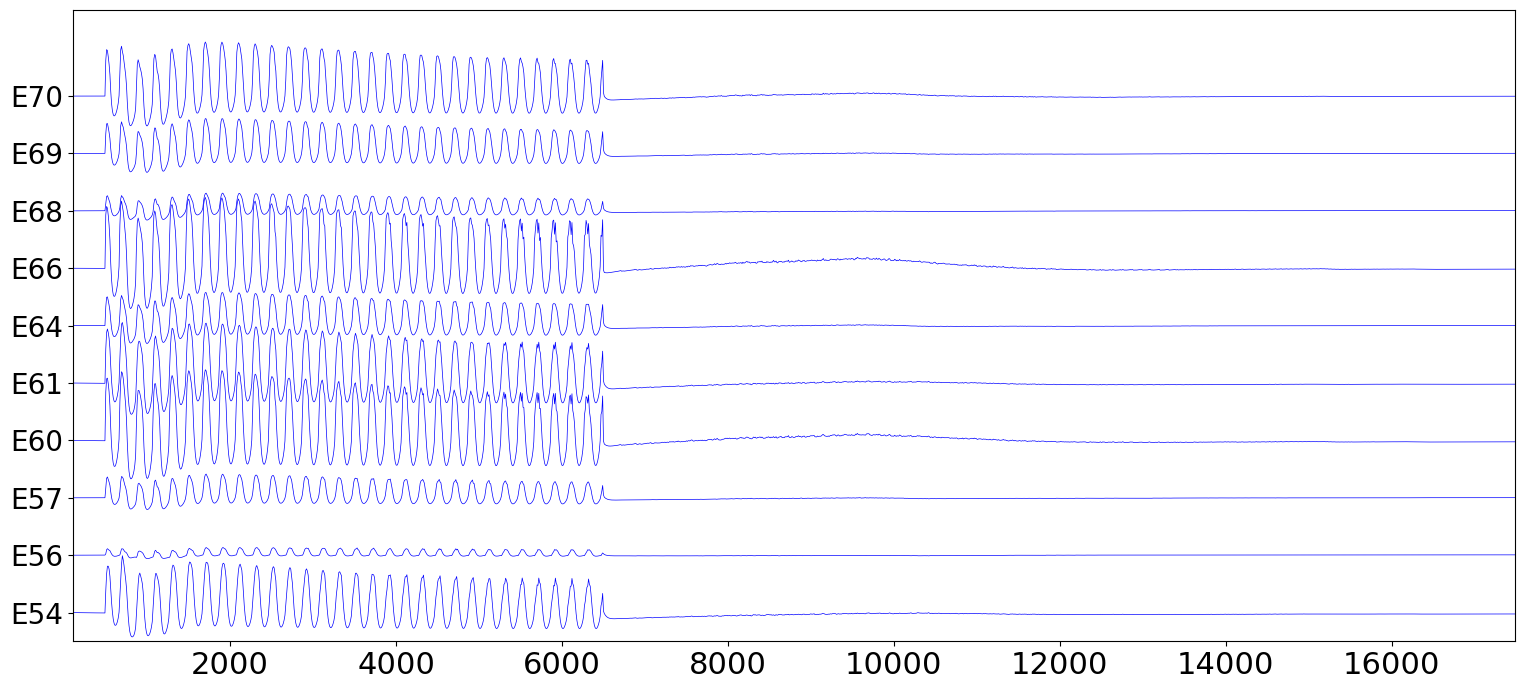

In [12]:
plt.figure(figsize=[15,7])
scaleplt = 0.00002


start_idx = 10 ; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
end_idx = 3000; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
y = seeg_noise.T[start_idx:end_idx].T
t = time[start_idx:end_idx]
slp = y
#baseline = np.min(np.mean(slp[:,nch],axis=0))
#baseline = slp[:,0]
for ind, ich in enumerate(nch):
    
    plt.plot(t, scaleplt*(y[ich]-y[ich,0]) + ind, 'blue', lw=0.5);
    '''
    if ind < 1:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline)+ ind, 'red',lw=1);
    else:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline) - 1+ ind, 'red',lw=1);
    '''

plt.xticks(fontsize=22)
plt.ylim([-0.5,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.tight_layout()
#plt.title(f'{pid}:ts_{szr_name}')
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=20);

In [13]:
from scipy import signal
import matplotlib.pyplot as plt

IND_ON = 700
IND_OFF = 1600
seeg_4feature = seeg[:,IND_ON:IND_OFF]

raw_eeg = seeg_4feature
sos = signal.butter(4, 2., 'hp', fs=250., output='sos')
filtered = signal.sosfilt(sos, raw_eeg)

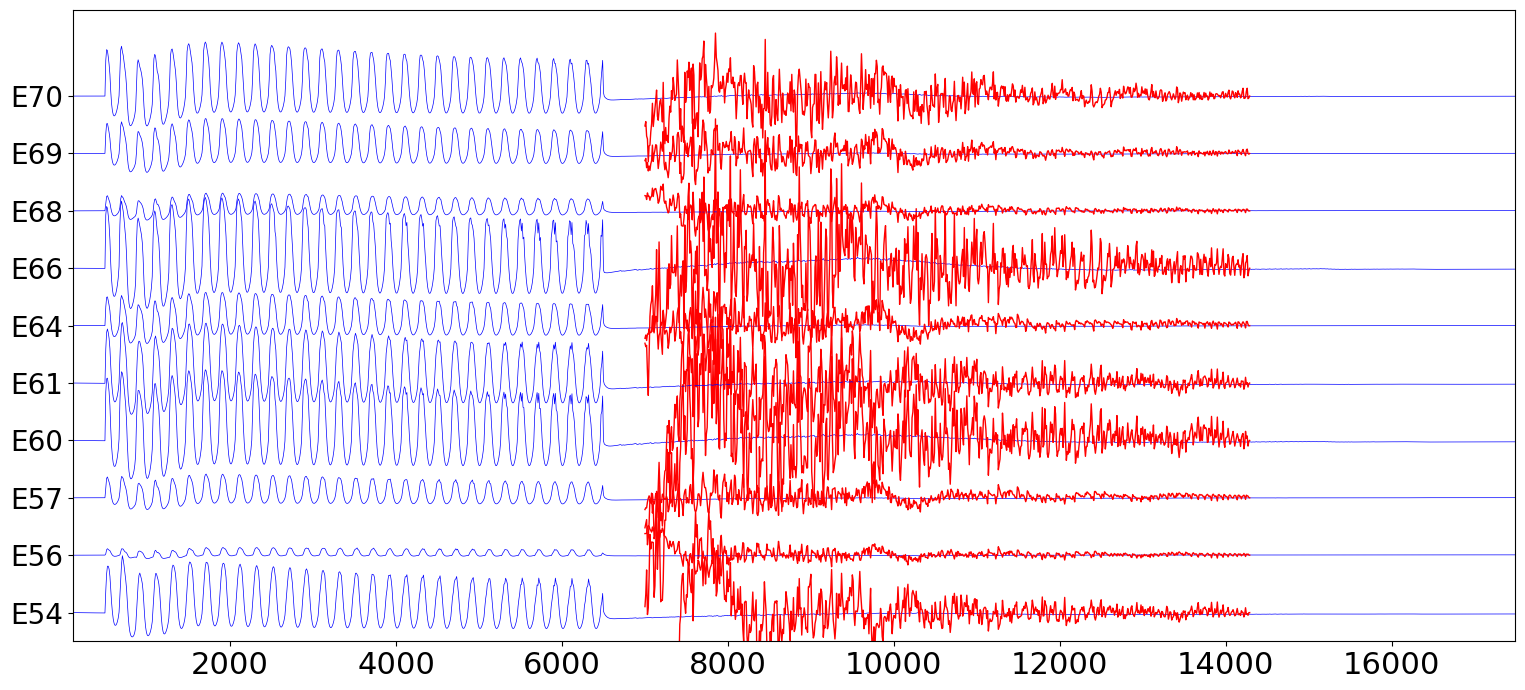

In [14]:
plt.figure(figsize=[15,7])
scaleplt_filted = 0.0015
scaleplt = 0.00002

start_idx = 10; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
end_idx = 3000; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
y = seeg_noise.T[start_idx:end_idx].T
t = time[start_idx:end_idx]



start_idx = 70; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
end_idx = 800; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
y_filted = filtered.T[start_idx:end_idx].T 
t_filted = np.arange(np.shape(y_filted)[1])*10+ 7000

#baseline = np.min(np.mean(slp[:,nch],axis=0))
#baseline = slp[:,0]
for ind, ich in enumerate(nch):
    plt.plot(t, scaleplt*(y[ich]-y[ich,0]) + ind, 'blue', lw=0.5);

    plt.plot(t_filted, scaleplt_filted*(y_filted[ich]-y_filted[ich,-1]) + ind, 'red', lw=1);
    '''
    if ind < 1:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline)+ ind, 'red',lw=1);
    else:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline) - 1+ ind, 'red',lw=1);
    '''

plt.xticks(fontsize=22)
plt.ylim([-0.5,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.tight_layout()
#plt.title(f'{pid}:ts_{szr_name}')
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=20);